# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Import Dataset

In [2]:
glass_dataset = pd.read_csv("glass.csv")
glass_dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [15]:
glass_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [16]:
import seaborn as sns

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


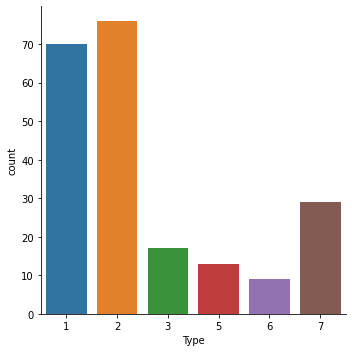

In [21]:
sns.factorplot('Type',data= glass_dataset, kind= "count", size = 5)

# Seperating Features and Target

In [3]:
X = glass_dataset.drop(columns='Type', axis=1)
Y = glass_dataset['Type']

In [4]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [5]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

# Train Test Split

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y,random_state=2)

In [7]:
print(X.shape, X_train.shape, X_test.shape,Y.shape,Y_train.shape,Y_test.shape)

(214, 9) (171, 9) (43, 9) (214,) (171,) (43,)


In [8]:
Y_test

173    5
145    2
80     2
89     2
40     1
26     1
47     1
165    5
180    6
163    5
140    2
152    3
178    6
88     2
199    7
113    2
206    7
157    3
131    2
34     1
122    2
78     2
154    3
31     1
204    7
21     1
15     1
110    2
92     2
43     1
7      1
11     1
191    7
62     1
126    2
193    7
138    2
107    2
22     1
71     2
20     1
209    7
49     1
Name: Type, dtype: int64

# Model Training

# KNN Classifier in sklearn

In [30]:
classifer = KNeighborsClassifier(n_neighbors=5, p=2) # Using Eucledian Distance
classifer.fit(X_train,Y_train)

KNeighborsClassifier()

In [31]:
# Model Evaluation

y_pred = classifer.predict(X_test)

In [32]:
y_pred

array([5, 1, 2, 2, 1, 1, 1, 5, 7, 2, 2, 1, 6, 2, 7, 2, 7, 1, 2, 1, 2, 1,
       1, 1, 7, 1, 1, 2, 2, 1, 1, 1, 7, 1, 1, 7, 2, 2, 1, 2, 1, 7, 3],
      dtype=int64)

In [33]:
accuracy = accuracy_score(Y_test,y_pred)
print(accuracy*100)

79.06976744186046
